<a href="https://colab.research.google.com/github/hsym-uec/myWeb_github/blob/main/Simmple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Nintendo Stock data from Stooq.com 7974.JP
# reference https://seanmemo.com/234/

from PIL import Image
import tkinter as tk
import mplfinance as mpf
import datetime
from datetime import timedelta
from pandas_datareader import data
import pandas as pd
global df
global stdata
stdata = pd.read_csv(filepath_or_buffer="data.csv", encoding="ms932", sep=",")

def btn_click():
    global df
    global stdata
    code = stdata[stdata["name"] == variable.get()]["code"].to_string(index=False)
    #code = txt1.get()     
    days = txt2.get()
    #days = input("範囲指定:")
    today = datetime.date.today()
    start = today - timedelta(float(days))
    end = today
    df = data.DataReader(code, 'stooq', start, end)
    window = tk.Toplevel()
    window.geometry("800x575")
    window.title("画像表示")

    fig = 'fig/test.png'
    # イメージ作成
    dfc = df.sort_index()
    mpf.plot(dfc,type='candle',mav=(3, 6, 9),volume=True,savefig=fig)
    img = Image.open(fig)
    h = img.height
    w = img.width
        
    # キャンバス作成
    canvas = tk.Canvas(window, bg="white", height=h, width=w)
    # キャンバス表示
    canvas.place(x=0, y=0)
    # キャンバスにイメージを表示
    img = tk.PhotoImage(file=fig)
    canvas.create_image(0, 0, image=img, anchor=tk.NW)
    
    window.mainloop()
    

root = tk.Tk()
root.title("株価表示")
root.geometry("300x200")

lbl1 = tk.Label(text='コード：')
lbl1.place(x=30, y=40)
lbl2 = tk.Label(text='範囲：')
lbl2.place(x=30, y=70)

txt1 = tk.Entry(width=20)
txt1.place(x=80, y=40)
txt2 = tk.Entry(width=20)
txt2.place(x=80, y=70)



variable = tk.StringVar(root)

opt = tk.OptionMenu(root, variable, *stdata["name"])
opt.config(width=90, font=('Helvetica', 12))
opt.pack()

btn = tk.Button(text='グラフ表示', command=btn_click)
btn.pack(side=tk.BOTTOM, fill=tk.X)

root.mainloop()

In [24]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-24,3378,3386,3302,3340,1605800
2023-05-23,3424,3449,3381,3393,1842800
2023-05-22,3361,3409,3353,3400,1501200
2023-05-19,3388,3401,3364,3388,1818600
2023-05-18,3333,3363,3322,3337,1891100
2023-05-17,3278,3309,3273,3294,2232000
2023-05-16,3261,3281,3235,3263,2318100
2023-05-15,3250,3272,3230,3261,2122000
2023-05-12,3179,3253,3176,3245,3157900


<Axes: xlabel='Date'>

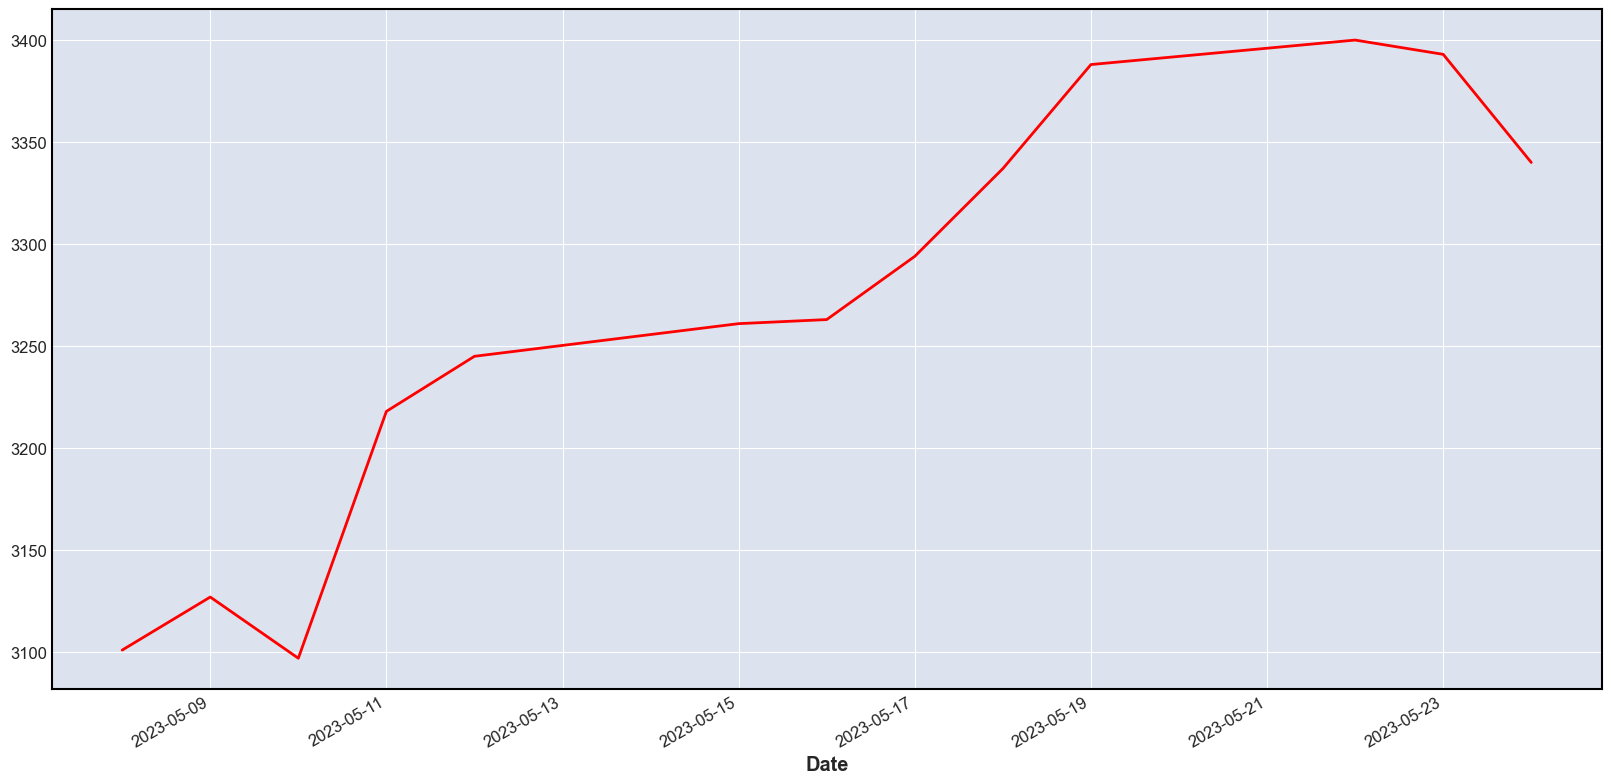

In [25]:
df["Close"].plot(figsize=(20,10), color="red")

In [26]:
# 前日と前々日の差額
df["Close"][0] - df["Close"][1]

-53

In [27]:
df["Close"]["2023-05-16"]

3263

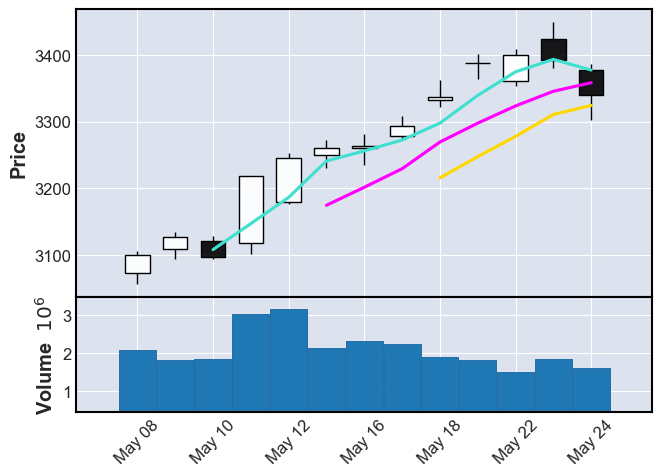

In [28]:
dfc = df.sort_index()
mpf.plot(dfc,type='candle',mav=(3, 6, 9),volume=True)